In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

import gmplot

from mpl_toolkits.basemap import Basemap


In [2]:
seattle_listings=pd.read_csv("seattle/listings.csv")
boston_listings=pd.read_csv("boston/listings.csv")

In [3]:
seattle_listings=seattle_listings[seattle_listings["beds"].isnull()==False]

In [4]:
for i in range(0,seattle_listings.shape[0]):
    print (i, end="\r")
    seattle_listings["price"].iloc[i]=float(seattle_listings["price"].iloc[i].replace(",","").replace("$",""))/seattle_listings["beds"].iloc[i]

E:\Users\xbxb\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
boston_listings=boston_listings[boston_listings["beds"].isnull()==False]

In [6]:
for i in range(0,boston_listings.shape[0]):
    print (i, end="\r")
    boston_listings["price"].iloc[i]=float(boston_listings["price"].iloc[i].replace(",","").replace("$",""))/boston_listings["beds"].iloc[i]

E:\Users\xbxb\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


E:\Users\xbxb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
boston_listings=boston_listings[boston_listings["price"]!=np.inf]

In [14]:
boston_listings=boston_listings[boston_listings["price"]>30]

In [15]:
boston_listings=boston_listings[boston_listings["price"]<200]

In [19]:
boston_listings["price"].shape

(3072,)

In [30]:
df = pd.DataFrame()
df['latitude'] = seattle_listings['latitude'].ffill()
df['longitude'] = seattle_listings['longitude'].ffill()
latitudes = df['latitude']
longitudes = df['longitude']

latitudes = latitudes.tolist()
longitudes = longitudes.tolist()

In [34]:
max(latitudes)

47.73335790856483

http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=742831.7243783957,2909001.2109427303,793918.1860500771,2971202.025723637&bboxSR=2249&imageSR=2249&size=7000,8522&dpi=96&format=png32&transparent=true&f=image


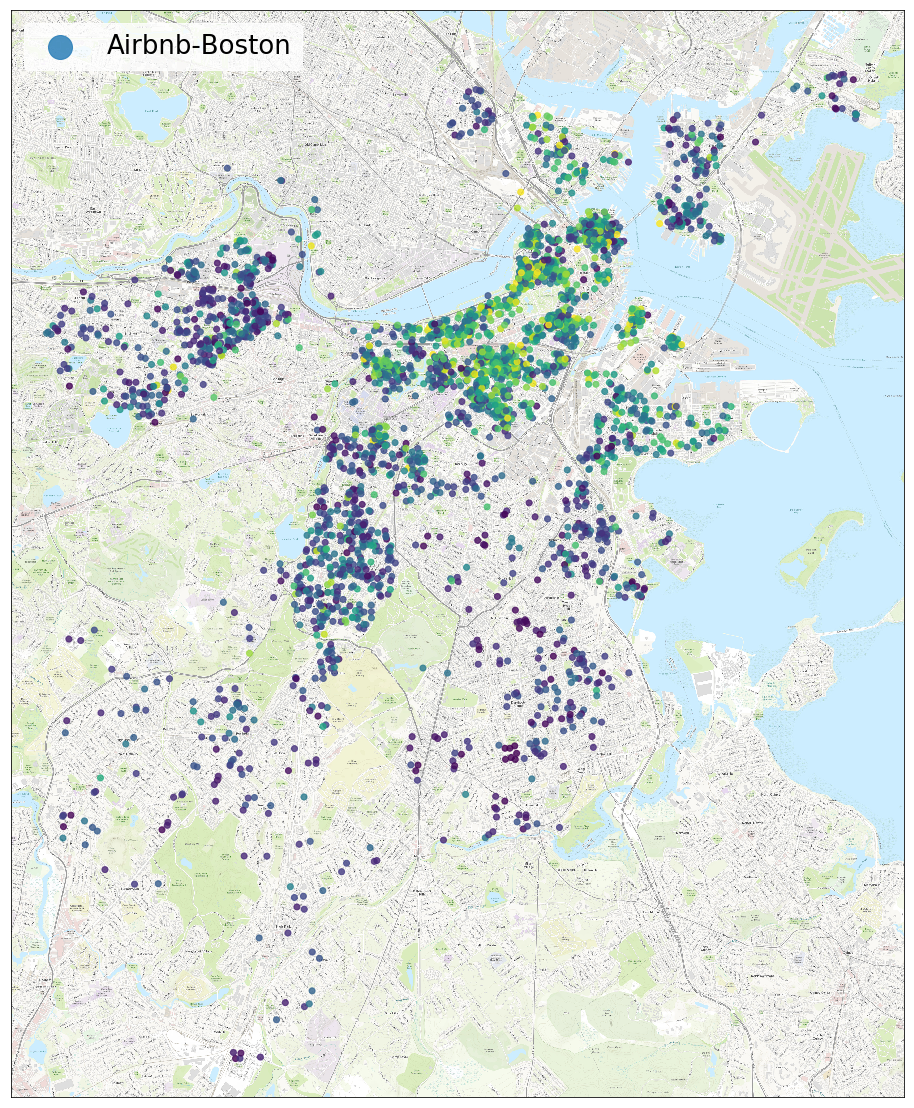

In [20]:
figComp= plt.figure(figsize=(20,20))


themap = Basemap(projection='mill', llcrnrlat=42.23, urcrnrlat=42.4, llcrnrlon=-71.18, urcrnrlon=-70.99, epsg=2249)

#themap.drawcountries()
#themap.drawstates()
#themap.drawrivers()
#themap.drawmapboundary()
themap.arcgisimage(service='World_Topo_Map', xpixels=7000, verbose=True)
#ncolors = 20

#cmap = plt.get_cmap('coolwarm')

x,y = themap(boston_listings.longitude.values, boston_listings.latitude.values)
themap.scatter(x,y,c=boston_listings.price,alpha=0.8, label = 'Airbnb-Boston')



legend = plt.legend(frameon = True, fontsize=26, loc='upper left', markerscale=4)
frame = legend.get_frame()
frame.set_color('white')
plt.show()

In [21]:
seattle_listings=seattle_listings[seattle_listings["price"]!=np.inf]

In [29]:
seattle_listings=seattle_listings[seattle_listings["price"]>30]
seattle_listings=seattle_listings[seattle_listings["price"]<200]

http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=1248236.8166615206,186428.3392483359,1294255.9607673257,269445.1073627535&bboxSR=2285&imageSR=2285&size=7000,12627&dpi=96&format=png32&transparent=true&f=image


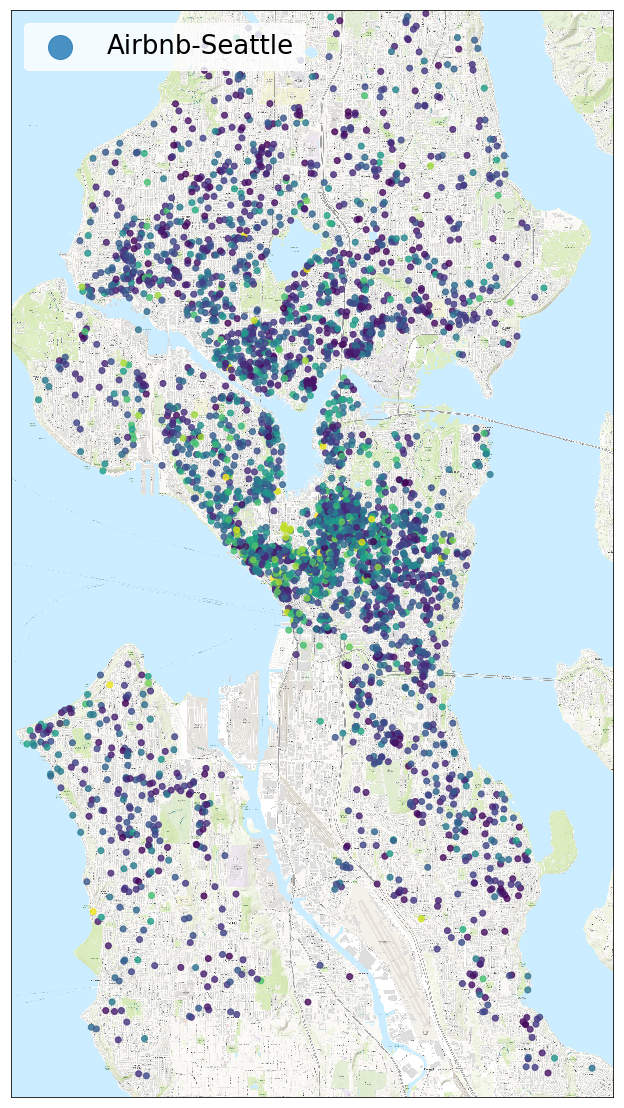

In [35]:
figComp= plt.figure(figsize=(20,20))


themap = Basemap(projection='mill', llcrnrlat=47.50, urcrnrlat=47.73, llcrnrlon=-122.42, urcrnrlon=-122.24, epsg=2285)

#themap.drawcountries()
#themap.drawstates()
#themap.drawrivers()
#themap.drawmapboundary()
themap.arcgisimage(service='World_Topo_Map', xpixels=7000, verbose=True)
#ncolors = 20

#cmap = plt.get_cmap('coolwarm')

x,y = themap(seattle_listings.longitude.values, seattle_listings.latitude.values)
themap.scatter(x,y,c=seattle_listings.price,alpha=0.8, label = 'Airbnb-Seattle')



legend = plt.legend(frameon = True, fontsize=26, loc='upper left', markerscale=4)
frame = legend.get_frame()
frame.set_color('white')
plt.show()